In [1]:
import numpy as np
import scipy as sp
import sympy as smp
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.axes as axes
import math
import statistics as stat
from scipy import optimize
import uncertainties as uc
import uncertainties.unumpy as unp 
unv=unp.nominal_values
usd=unp.std_devs

In [2]:
#Gleichstrom
Uw=Ug=np.array([5,10,15,20,23])
uU=1/(2*np.sqrt(6))
Uw=Ug=unp.uarray(Ug,uU)
Ig=np.array([0.19,0.33,0.55,0.73,0.82])
uI=0.01/(2*np.sqrt(6))
Ig=unp.uarray(Ig,uI)
Pg=np.array([0.9,3.3,7.5,13.9,18])
uP=0.1/(2*np.sqrt(6))
Pg=unp.uarray(Pg,uP)
Iw=np.array([0.21,0.39,0.57,0.77,0.87])
Iw=unp.uarray(Iw,uI)
Pw=np.array([0.8,3.3,7.8,14.5,18.8])
Pw=unp.uarray(Pw,uP)

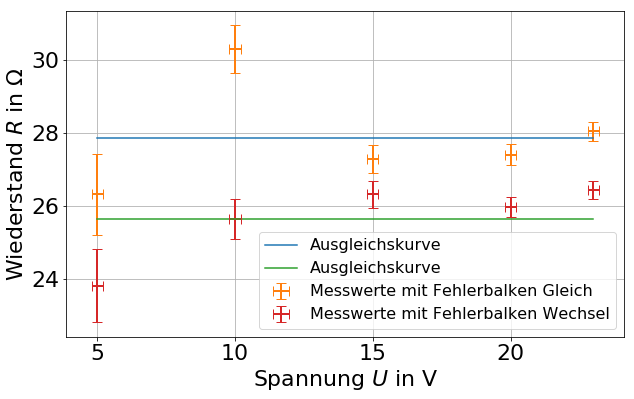

In [3]:
#Gleich
def c(x,b):
    return(b+0*x)

fig=plt.figure(figsize=(10,6))


x=unv(Ug)
ux=usd(Ug)
y=unv(Ug/Ig)
uy=usd(Ug/Ig)
p0=[20]
poptgl, pcovgl, infodict, errmsg, ier = optimize.curve_fit(c,x,y,p0=p0, full_output= True)
plt.plot(x,c(x,*poptgl),label='Ausgleichskurve')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,uy,ux,fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken Gleich')


x=unv(Uw)
ux=usd(Uw)
y=unv(Uw/Iw)
uy=usd(Uw/Iw)

p0=[20]
poptw, pcovw, infodict, errmsg, ier = optimize.curve_fit(c,x,y,p0=p0, full_output= True)
plt.plot(x,c(x,*poptw),label='Ausgleichskurve')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,uy,ux,fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken Wechsel')

plt.legend(prop={'size':16}) #ehem 14
plt.grid()
plt.tick_params(labelsize=22)
plt.ylabel("Wiederstand $R$ in $\Omega$ ", {'fontsize':22})
plt.xlabel("Spannung $U$ in V", {'fontsize': 22})
plt.savefig("WiederstandR2 A.pdf")
plt.show()

In [4]:
poptgl, np.mean(Ug/Ig),poptw, np.mean(Uw/Iw)

(array([ 27.86751756]),
 27.867517562243854+/-0.2793396868197131,
 array([ 25.6354293]),
 25.63542930149101+/-0.2499101052572527)

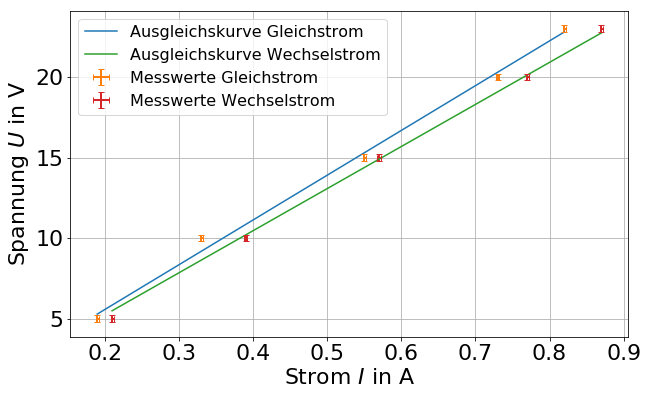

In [5]:
#Widerstand
def c(x,b):
    return(b*x)

fig=plt.figure(figsize=(10,6))


x=unv(Ig)
ux=usd(Ig)
y=unv(Ug)
uy=usd(Ug)
p0=[20]
poptgl, pcovgl, infodict, errmsg, ier = optimize.curve_fit(c,x,y,p0=p0, full_output= True)
plt.plot(x,c(x,*poptgl),label='Ausgleichskurve Gleichstrom')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,uy,ux,fmt='none', capsize=3, linewidth=2, label='Messwerte Gleichstrom')


x=unv(Iw)
ux=usd(Iw)
y=unv(Uw)
uy=usd(Uw)

p0=[20]
poptw, pcovw, infodict, errmsg, ier = optimize.curve_fit(c,x,y,p0=p0, full_output= True)
plt.plot(x,c(x,*poptw),label='Ausgleichskurve Wechselstrom')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,uy,ux,fmt='none', capsize=3, linewidth=2, label='Messwerte Wechselstrom')

plt.legend(prop={'size':16}) #ehem 14
plt.grid()
plt.tick_params(labelsize=22)
plt.xlabel("Strom $I$ in A", {'fontsize':22})
plt.ylabel("Spannung $U$ in V", {'fontsize': 22})
plt.savefig("Widerstand R2 B.pdf")
plt.show()

In [6]:
poptgl,np.sqrt(np.diag(pcovgl)) , np.mean(Ug/Ig),poptw, np.mean(Uw/Iw)

(array([ 27.80735721]),
 array([ 0.38380328]),
 27.867517562243854+/-0.2793396868197131,
 array([ 26.14249826]),
 25.63542930149101+/-0.2499101052572527)

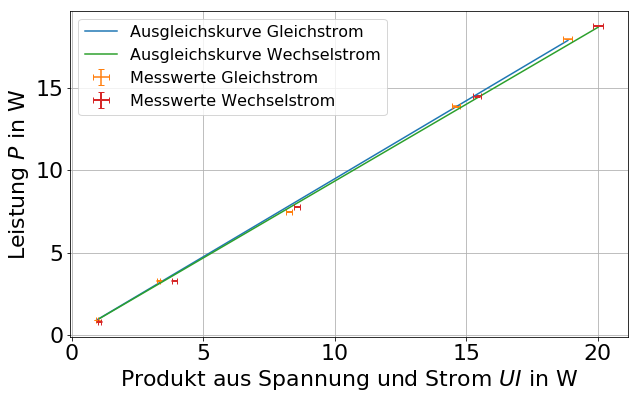

In [7]:
#Leistung
def c(x,b):
    return(b*x)

fig=plt.figure(figsize=(10,6))


x=unv(Ig*Ug)
ux=usd(Ig*Ug)
y=unv(Pg)
uy=usd(Pg)
p0=[20]
poptpgl, pcovpgl, infodict, errmsg, ier = optimize.curve_fit(c,x,y,p0=p0, full_output= True)
plt.plot(x,c(x,*poptpgl),label='Ausgleichskurve Gleichstrom')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,uy,ux,fmt='none', capsize=3, linewidth=1.5, label='Messwerte Gleichstrom')


x=unv(Iw*Uw)
ux=usd(Iw*Uw)
y=unv(Pw)
uy=usd(Pw)

p0=[20]
poptpw, pcovpw, infodict, errmsg, ier = optimize.curve_fit(c,x,y,p0=p0, full_output= True)
plt.plot(x,c(x,*poptpw),label='Ausgleichskurve Wechselstrom')
#plt.errorbar(unv(I1),unv(U1),usd(U1),usd(I1),fmt='none', capsize=5, linewidth=2, label='Messwerte mit Fehlerbalken')
plt.errorbar(x,y,uy,ux,fmt='none', capsize=3, linewidth=2, label='Messwerte Wechselstrom')

plt.legend(prop={'size':16}) #ehem 14
plt.grid()
plt.tick_params(labelsize=22)
plt.ylabel("Leistung $P$ in W ", {'fontsize':22})
plt.xlabel("Produkt aus Spannung und Strom $UI$ in W", {'fontsize': 22})
plt.savefig("Leistung 2.pdf")
plt.show()

In [8]:
poptpgl,poptpw,np.sqrt(np.diag(pcovpw))

(array([ 0.94963178]), array([ 0.93522873]), array([ 0.00848204]))